UPPGIFT 3a: Implementera och verifiera trapetsregeln
Testintegral: ∫₀² x³eˣ dx = 6 + 2e² ≈ 20.7781

     n          T_n          Fel
--------------------------------
    10    21.269321     4.91e-01
   100    20.783038     4.93e-03
  1000    20.778161     4.93e-05

Trapetsregeln fungerar korrekt! ✓
UPPGIFT 3b: Konvergensstudie - trapetsregeln

         h      n          T_h          e_h
  1.000000      2    32.274506     1.15e+01
  0.500000      4    23.803148     3.03e+00
  0.250000      8    21.544405     7.66e-01
  0.125000     16    20.970322     1.92e-01
  0.062500     32    20.826205     4.81e-02
  0.031250     64    20.790138     1.20e-02
  0.015625    128    20.781119     3.01e-03
  0.007812    256    20.778864     7.52e-04
  0.003906    512    20.778300     1.88e-04
  0.001953   1024    20.778159     4.70e-05

Noggrannhetsordning (teori: p=2 för trapetsregeln):
        h₁         h₂          p
  1.000000   0.500000     1.9262
  0.500000   0.250000     1.9810
  0.250000   0.125

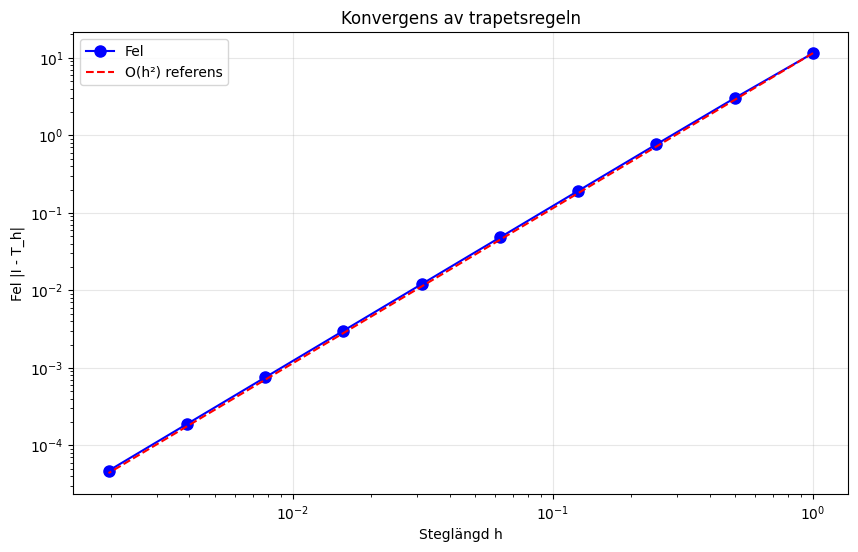

UPPGIFT 3c: Skatta energi från solceller (2014-2022)


TypeError: trapets() missing 1 required positional argument: 'n'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data från tabell 2
t_data = np.array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])
f_data = np.array([12.00, 15.10, 19.01, 23.92, 30.11, 37.90, 47.70, 60.03, 75.56])

def trapets(func, a, b, n):
    """
    Numerisk integration med trapetsregeln
    
    Parameters:
    -----------
    func : callable
        Funktionshandtag för funktionen som ska integreras
    a, b : float
        Integralgränser (kan vara vektorer för flera intervall)
    n : int
        Antal delintervall
    
    Returns:
    --------
    float : Approximativ integral
    """
    if isinstance(a, (list, np.ndarray)):
        # Om a och b är vektorer (för diskreta datapunkter)
        x = a
        y = b  # Här är b faktiskt funktionsvärden
        h = np.diff(x)
        integral = np.sum(h * (y[:-1] + y[1:])) / 2
        return integral
    else:
        # Standard trapetsregel med jämnt steglängd
        h = (b - a) / n
        x = np.linspace(a, b, n+1)
        y = func(x)
        integral = h * (y[0]/2 + np.sum(y[1:-1]) + y[-1]/2)
        return integral

def uppgift_3a():
    print("UPPGIFT 3a: Implementera och verifiera trapetsregeln")
    
    # Testfunktion: f(x) = x^3 * e^x på [0, 2]
    def test_func(x):
        return x**3 * np.exp(x)
    
    a, b = 0, 2
    I_exact = 6 + 2*np.exp(2)
    
    print(f"Testintegral: ∫₀² x³eˣ dx = 6 + 2e² ≈ {I_exact:.4f}")
    
    # Testa med olika antal delintervall
    n_values = [10, 100, 1000]
    print(f"\n{'n':>6} {'T_n':>12} {'Fel':>12}")
    print("-" * 32)
    
    for n in n_values:
        T_n = trapets(test_func, a, b, n)
        error = abs(I_exact - T_n)
        print(f"{n:6d} {T_n:12.6f} {error:12.2e}")
    

def uppgift_3b():
    print("UPPGIFT 3b: Konvergensstudie - trapetsregeln")
    
    def test_func(x):
        return x**3 * np.exp(x)
    
    a, b = 0, 2
    I_exact = 6 + 2*np.exp(2)
    
    # Olika steglängder via halvering
    h_values = []
    errors = []
    n = 2
    
    print(f"\n{'h':>10} {'n':>6} {'T_h':>12} {'e_h':>12}")
    
    for i in range(10):
        h = (b - a) / n
        T_h = trapets(test_func, a, b, n)
        e_h = abs(I_exact - T_h)
        
        h_values.append(h)
        errors.append(e_h)
        
        print(f"{h:10.6f} {n:6d} {T_h:12.6f} {e_h:12.2e}")
        
        n *= 2
    
    # Beräkna noggrannhetsordning
    print("\nNoggrannhetsordning (teori: p=2 för trapetsregeln):")
    print(f"{'h₁':>10} {'h₂':>10} {'p':>10}")
    
    for i in range(len(h_values)-1):
        h1 = h_values[i]
        h2 = h_values[i+1]
        e1 = errors[i]
        e2 = errors[i+1]
        
        # e_h = Ch^p => log(e1/e2) = p*log(h1/h2)
        p = np.log(e1/e2) / np.log(h1/h2)
        print(f"{h1:10.6f} {h2:10.6f} {p:10.4f}")
    
    # Plotta konvergens
    plt.figure(figsize=(10, 6))
    plt.loglog(h_values, errors, 'bo-', label='Fel', markersize=8)
    plt.loglog(h_values, np.array(h_values)**2 * errors[0]/h_values[0]**2, 
               'r--', label='O(h²) referens')
    plt.xlabel('Steglängd h')
    plt.ylabel('Fel |I - T_h|')
    plt.title('Konvergens av trapetsregeln')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

def uppgift_3c():
    print("UPPGIFT 3c: Skatta energi från solceller (2014-2022)")
    
    # Använd trapetsregeln med diskreta data
    # h = 1 år mellan punkterna
    integral = trapets(t_data, f_data, None)
    
    print(f"\nSteglängd: h = 1 år")
    print(f"Datapunkter: {len(t_data)}")
    print(f"\nSkattat värde: ∫₂₀₁₄²⁰²² f(t)dt ≈ {integral:.2f} kWår")
    
    return integral

def uppgift_3d():
    print("UPPGIFT 3d: Konvergensstudie med befintlig data")
    
    # Skatta med olika h genom att använda varje n:te punkt
    T_values = []
    h_values = []
    
    # h = 1 (alla punkter)
    T1 = trapets(t_data, f_data, None)
    T_values.append(T1)
    h_values.append(1)
    
    # h = 2 (varannan punkt)
    indices_2 = np.arange(0, len(t_data), 2)
    T2 = trapets(t_data[indices_2], f_data[indices_2], None)
    T_values.append(T2)
    h_values.append(2)
    
    # h = 4 (var fjärde punkt)
    indices_4 = np.arange(0, len(t_data), 4)
    T4 = trapets(t_data[indices_4], f_data[indices_4], None)
    T_values.append(T4)
    h_values.append(4)
    
    # h = 8 (var åttonde punkt - endast 2014 och 2022 om möjligt)
    # Men vi har bara 9 punkter, så detta blir första och sista
    T8 = (t_data[-1] - t_data[0]) * (f_data[0] + f_data[-1]) / 2
    T_values.append(T8)
    h_values.append(8)
    
    print(f"\n{'h':>5} {'T_h':>12}")
    print("-" * 20)
    for h, T in zip(h_values, T_values):
        print(f"{h:5d} {T:12.2f}")
    
    # Beräkna fel som e_{2h} ≈ |T_h - T_{2h}|
    print(f"\nFeluppskattningar och noggrannhetsordning:")
    print(f"{'h₁':>5} {'h₂':>5} {'e_2h':>12} {'p':>10}")
    print("-" * 38)
    
    for i in range(len(h_values)-1):
        h1 = h_values[i]
        h2 = h_values[i+1]
        T_h1 = T_values[i]
        T_h2 = T_values[i+1]
        e_2h = abs(T_h1 - T_h2)
        
        if i < len(h_values)-2:
            # Beräkna noggrannhetsordning
            e_2h_next = abs(T_values[i+1] - T_values[i+2])
            p = np.log(e_2h/e_2h_next) / np.log(2)
            print(f"{h1:5d} {h2:5d} {e_2h:12.2f} {p:10.4f}")
        else:
            print(f"{h1:5d} {h2:5d} {e_2h:12.2f} {'—':>10}")
    
    return T_values[0], T_values[1]

def uppgift_3e(T1, T2):
    print("UPPGIFT 3e: Richardsonextrapolation och Simpsons regel")
    
    # Richardsonextrapolation: R = (4*T_h - T_{2h}) / 3
    # Här är T1 med h=1 och T2 med h=2
    R = (4*T1 - T2) / 3
    
    print(f"\nRichardsonextrapolation:")
    print(f"  T_h=1   = {T1:.4f} kWår")
    print(f"  T_h=2   = {T2:.4f} kWår")
    print(f"  R       = (4×{T1:.4f} - {T2:.4f})/3 = {R:.4f} kWår")
    
    # Simpsons regel med h=1
    # Simpson: I ≈ h/3 * [f₀ + 4(f₁+f₃+...) + 2(f₂+f₄+...) + fₙ]
    h = 1
    n = len(f_data) - 1  # antal delintervall (8)
    
    if n % 2 == 0:  # jämnt antal delintervall
        S = h/3 * (f_data[0] + f_data[-1] + 
                   4*np.sum(f_data[1:-1:2]) +  # udda index
                   2*np.sum(f_data[2:-1:2]))    # jämna index
    else:
        print("Simpsons regel kräver jämnt antal delintervall")
        S = None
    
    print(f"\nSimpsons regel (h=1):")
    print(f"  S = {S:.4f} kWår")
    
    print(f"\nJämförelse:")
    print(f"  Richardsonextrapolation: {R:.4f} kWår")
    print(f"  Simpsons regel:          {S:.4f} kWår")
    print(f"  Skillnad:                {abs(R-S):.6f} kWår")
    
    return S

def uppgift_3f():
    print("UPPGIFT 3f: Exponentiell modell")
    
    # Modell: f(t) = a*e^{b(t-2014)}
    # Linjärisering: ln(f) = ln(a) + b(t-2014)
    # Sätt s = t-2014, y = ln(f), då: y = ln(a) + b*s
    
    s = t_data - 2014
    y = np.log(f_data)
    
    print("Linjäriserad modell: ln(f) = ln(a) + b(t-2014)")
    
    # Minstakvadrat: lös [1, s]^T [1, s] [ln(a); b] = [1, s]^T y
    A = np.column_stack([np.ones_like(s), s])
    c = np.linalg.solve(A.T @ A, A.T @ y)
    
    ln_a = c[0]
    b = c[1]
    a = np.exp(ln_a)
    
    print(f"\nKoefficienter:")
    print(f"  ln(a) = {ln_a:.6f}")
    print(f"  a     = {a:.6f}")
    print(f"  b     = {b:.6f}")
    print(f"\nExponentiell modell: f(t) = {a:.4f} × e^({b:.6f}(t-2014))")
    
    # Plotta anpassning
    t_plot = np.linspace(2014, 2022, 100)
    f_model = a * np.exp(b * (t_plot - 2014))
    f_model_data = a * np.exp(b * (t_data - 2014))
    
    plt.figure(figsize=(10, 6))
    plt.plot(t_plot, f_model, 'b-', linewidth=2, label='Exponentiell modell')
    plt.plot(t_data, f_data, 'ro', markersize=8, label='Data')
    plt.xlabel('År')
    plt.ylabel('Effekt [kW]')
    plt.title('Exponentiell modell för solcellseffekt')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()
    
    # Minstakvadratfel
    mse = np.sum((f_data - f_model_data)**2)
    print(f"\nMinstakvadratfel: {mse:.2f}")
    
    return a, b

def uppgift_3g(a, b, S_2014_2022):
    print("UPPGIFT 3g: Prediktion för 2023 och bedömning")
    
    # Prediktera effekt för 2023
    t_2023 = 2023
    f_2023 = a * np.exp(b * (t_2023 - 2014))
    
    print(f"\nPredikterad effekt år 2023:")
    print(f"  f(2023) = {a:.4f} × e^({b:.6f}×9) = {f_2023:.2f} kW")
    
    # Lägg till i data
    t_extended = np.append(t_data, t_2023)
    f_extended = np.append(f_data, f_2023)
    
    # Beräkna ny integral 2014-2023
    integral_2023 = trapets(t_extended, f_extended, None)
    
    print(f"\nTotal energi 2014-2023:")
    print(f"  ∫₂₀₁₄²⁰²³ f(t)dt ≈ {integral_2023:.2f} kWår")
    
    # Bedöm villkor
    print("BEDÖMNING AV PILOTPROJEKTET")
    
    villkor1 = f_2023 > 100
    villkor2 = integral_2023 > 350
    
    print(f"\nVillkor 1: Effekt 2023 > 100 kW")
    print(f"  f(2023) = {f_2023:.2f} kW")
    print(f"  Uppfyllt: {'JA' if villkor1 else 'NEJ'}")
    
    print(f"\nVillkor 2: Total energi 2014-2023 > 350 kWår")
    print(f"  Energi = {integral_2023:.2f} kWår")
    print(f"  Uppfyllt: {'JA' if villkor2 else 'NEJ'}")
    
    print(f"\n{'='*60}")
    if villkor1 or villkor2:
        print("RESULTAT: Pilotprojektet är LYCKAT! 🎉")
        if villkor1 and villkor2:
            print("Båda villkoren är uppfyllda!")
        elif villkor1:
            print("Villkor 1 är uppfyllt!")
        else:
            print("Villkor 2 är uppfyllt!")
    else:
        print("RESULTAT: Pilotprojektet är INTE lyckat.")

# HUVUDPROGRAM
if __name__ == "__main__":
    uppgift_3a()
    
    uppgift_3b()
    
    T_h1 = uppgift_3c()
    
    T1, T2 = uppgift_3d()
    
    S = uppgift_3e(T1, T2)
    
    a, b = uppgift_3f()
    
    uppgift_3g(a, b, S)